#  NSGA-II with external archive

The quality of the fronts obtained by NSGA-II can be improved if an external archive is incorporated into the algorithm. In this notebook, we show how to use an external bounded archive based on the crowding distance density estimator and compare the results of NSGA-II with and without using the archive. 

In [1]:
include("../src/bounds.jl")
include("../src/solution.jl")
include("../src/operator.jl")
include("../src/continuousProblem.jl")
include("../src/algorithm.jl")
include("../src/component.jl")
include("../src/utils.jl")

using Dates

## Problem to solve: ZDT1

In [2]:
problem = zdt1Problem()

ContinuousProblem{Float64}(Bounds{Float64}[Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0)  …  Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0)], Function[var"#47#50"(), var"#48#51"{var"#evalG#49"}(var"#evalG#49"())], Function[], "ZDT1")

## Standard NSGA-II configured to find 100 solutions

In [3]:
solver::NSGAII = NSGAII()
solver.problem = problem
solver.populationSize = 100

solver.solutionsCreation = defaultSolutionsCreation
solver.solutionsCreationParameters = (problem = solver.problem, numberOfSolutionsToCreate = solver.populationSize)

solver.evaluation = sequentialEvaluation
solver.evaluationParameters = (problem = solver.problem, )

solver.termination = terminationByEvaluations
solver.terminationParameters = (numberOfEvaluationToStop = 25000, )

solver.selection = solver.selection = binaryTournamentMatingPoolSelection
solver.selectionParameters = (matingPoolSize = 100, comparator = compareRankingAndCrowdingDistance)

solver.mutation = PolynomialMutation((probability=1.0/numberOfVariables(problem), distributionIndex=20.0, bounds=problem.bounds))

"""
solver.crossover = BLXAlphaCrossover((probability=1.0, alpha=0.5, bounds=problem.bounds))
"""

solver.crossover = SBXCrossover((probability=1.0, distributionIndex=20.0, bounds=problem.bounds))

SBXCrossover((probability = 1.0, distributionIndex = 20.0, bounds = Bounds{Float64}[Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0)  …  Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0)]), 2, 2, sbxCrossover)

### Run the algorithm

In [4]:
startingTime = Dates.now()
optimize(solver)
endTime = Dates.now()

println("Computing time: ", (endTime - startingTime))

Computing time: 1650 milliseconds


### Print the results

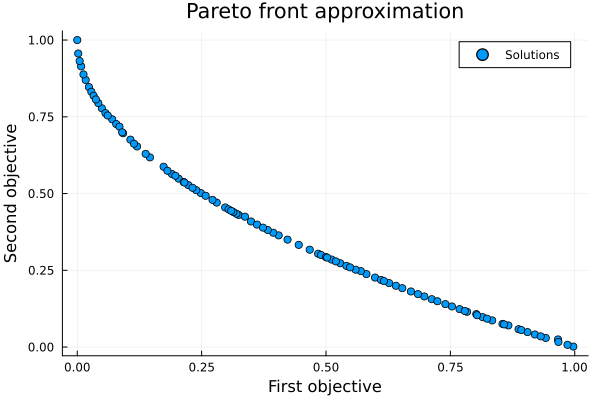

In [5]:
using Plots
 
#data to plot
x = [solution.objectives[1] for solution in solver.foundSolutions];
y = [solution.objectives[2] for solution in solver.foundSolutions];
 
gr();
 
scatter(x, y,  title = "Pareto front approximation", label = "Solutions")
xlabel!("First objective")
ylabel!("Second objective")

## NSGA-II configured with an external archive

The external archive is incorporated into NSGA-II by using a `sequentialEvaluationWithArchive` component, which adds the evaluated solutions to the archive.

In [6]:
externalArchive = CrowdingDistanceArchive(solver.populationSize, ContinuousSolution{Float64})
solver.evaluation = sequentialEvaluationWithArchive
solver.evaluationParameters = (problem = solver.problem, archive = externalArchive)

(problem = ContinuousProblem{Float64}(Bounds{Float64}[Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0)  …  Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0), Bounds{Float64}(0.0, 1.0)], Function[var"#47#50"(), var"#48#51"{var"#evalG#49"}(var"#evalG#49"())], Function[], "ZDT1"), archive = CrowdingDistanceArchive{ContinuousSolution{Float64}}(100, NonDominatedArchive{ContinuousSolution{Float64}}(ContinuousSolution{Float64}[])))

In [7]:
startingTime = Dates.now()
optimize(solver)
endTime = Dates.now()

println("Computing time: ", (endTime - startingTime))

MethodError: MethodError: no method matching sequentialEvaluationWithArchive(::Vector{Solution}, ::NamedTuple{(:problem, :archive), Tuple{ContinuousProblem{Float64}, CrowdingDistanceArchive{ContinuousSolution{Float64}}}})
Closest candidates are:
  sequentialEvaluationWithArchive(::Vector{Solution}, !Matched::NamedTuple{(:archive, :problem), Tuple{A, P}}) where {A<:Archive, P<:Problem} at ~/Softw/julia/metajul/src/component.jl:23

### The result of the algorithm execution is the external archive

┌ Warning: Keyword argument letter not supported with Plots.GRBackend().  Choose from: annotations, arrow, aspect_ratio, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, connections, contour_labels, discrete_values, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, html_output_format, inset_subplots, label, layout, left_margin, legend_background_color, legend_font_color, legend_font_family, legend_font_halign, legend_font_pointsize, legend_font_rotation, legend_font_valign, legend_foreground_color, legend_positio

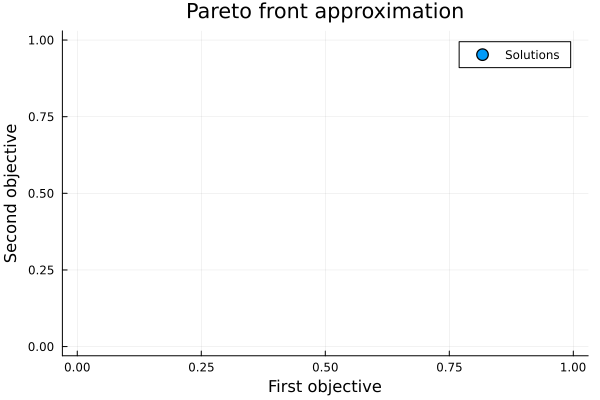

In [8]:
#data to plot
x = [solution.objectives[1] for solution in getSolutions(externalArchive)];
y = [solution.objectives[2] for solution in getSolutions(externalArchive)];
 
gr();
 
scatter(x, y,  title = "Pareto front approximation", label = "Solutions")
xlabel!("First objective")
ylabel!("Second objective")

We observe a remarkable improvement in the diversity of the solutions when using the archive at the cost of an overhead in the total computing time.